Mean Squared Error (MSE): 2438.5160129151473
Mean Absolute Error (MAE): 28.248912371459852
R-squared (R²): 0.42865276927086393


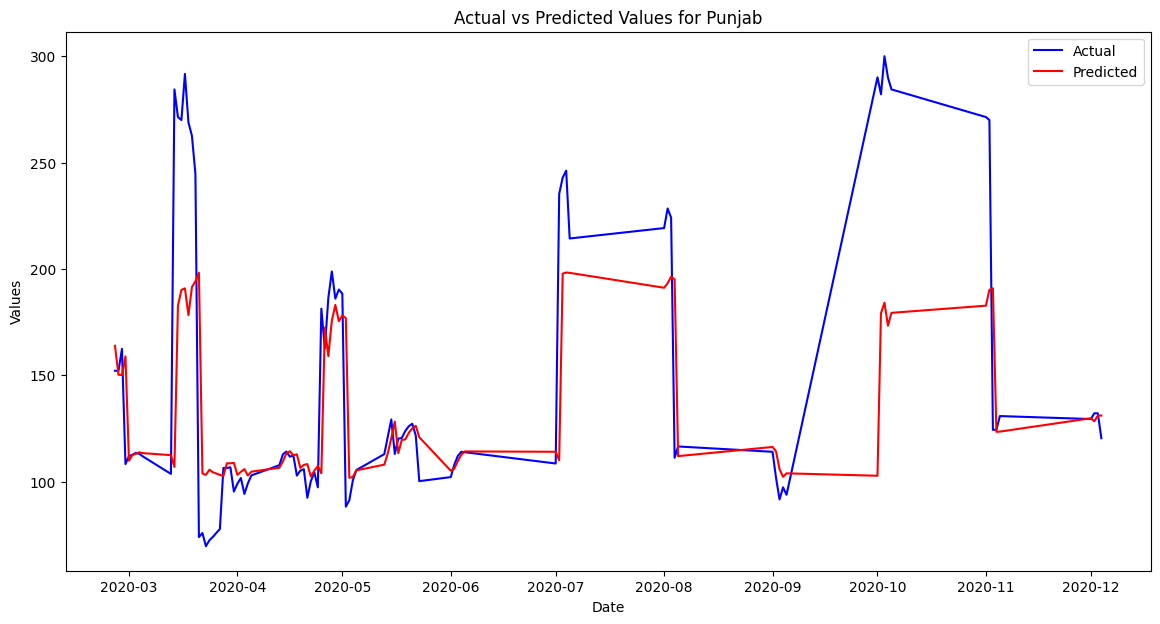

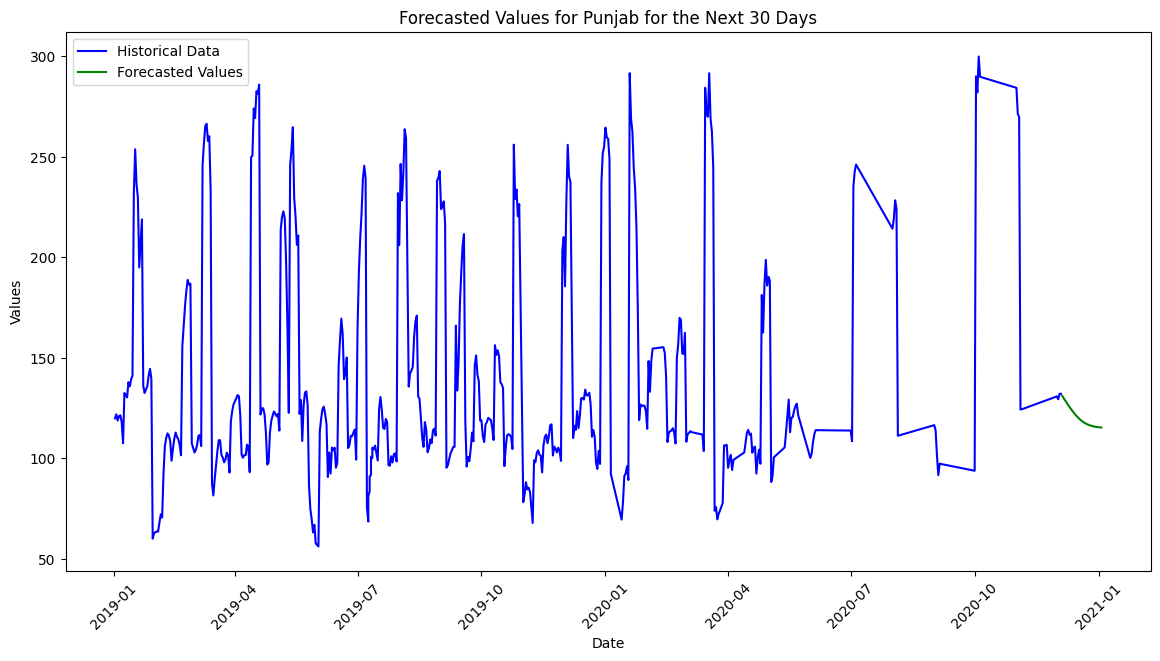

            Forecasted
2020-12-05  131.044732
2020-12-06  129.996916
2020-12-07  128.958709
2020-12-08  127.933211
2020-12-09  126.924389
2020-12-10  125.936959
2020-12-11  124.976210
2020-12-12  124.047778
2020-12-13  123.157368
2020-12-14  122.310447
2020-12-15  121.511937
2020-12-16  120.765929
2020-12-17  120.075459
2020-12-18  119.442357
2020-12-19  118.867195
2020-12-20  118.349325
2020-12-21  117.886999
2020-12-22  117.477551
2020-12-23  117.117609
2020-12-24  116.803325
2020-12-25  116.530579
2020-12-26  116.295172
2020-12-27  116.092973
2020-12-28  115.920032
2020-12-29  115.772664
2020-12-30  115.647488
2020-12-31  115.541455
2021-01-01  115.451850
2021-01-02  115.376280
2021-01-03  115.312656


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('C:/Users/Shree/Desktop/dataset_tk.csv')

# Select a state for analysis, e.g., Punjab
state = 'Punjab'
data = df[['Date', state]].copy()

# Convert the 'Date' column to datetime format with dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

# Prepare the dataset for time series analysis
data[state] = data[state].astype(float)

# Create a new column for the target (next day's value)
data['Target'] = data[state].shift(-1)
data.dropna(inplace=True)

# Split data into features and target
X = data[[state]].values
y = data['Target'].values

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Train the SVM model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted', color='red')
plt.title(f'Actual vs Predicted Values for {state}')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

# Forecast future values (for the next 30 days)
future_predictions = []
last_data_point = X[-1].reshape(1, -1)  # Last known data point

for _ in range(30):
    next_value = svr.predict(scaler.transform(last_data_point))
    future_predictions.append(next_value[0])
    last_data_point = np.array([[next_value[0]]])  # Update last data point

# Generate future dates
last_date = data.index[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 31)]

# Plotting future forecasts
plt.figure(figsize=(14, 7))
plt.plot(data.index, data[state], label='Historical Data', color='blue')
plt.plot(future_dates, future_predictions, label='Forecasted Values', color='green')
plt.title(f'Forecasted Values for {state} for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Print forecasted values
forecasted_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Forecasted'])
print(forecasted_df)
